Set up the Python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akashmalik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
dftrainn = pd.read_csv("1_TrainingSet_3Class.csv", header=None)
dftestt  = pd.read_csv("1_TestSet_3Class.csv", header=None)
dftrainn = dftrainn.sample(frac=0.2, random_state=42)
dftestt = dftestt.sample(frac=0.2, random_state=42)

dftrainn.head()


,0,1,2
34516,1,s894988522347692033,COMPLETE highway MM . EB @ Plsntview/mile Left...
25609,2,s905404834907643904,Motorists traveling north from Coweta and surr...
5687,0,s898626084454793216,Who knew making coasters could be so mesmerizi...
32239,0,s902260245912629248,Plan Commission will look at update to long-pl...
17636,0,s902955766461673473,She like the way I put my words together. Now ...


In [4]:
dftrainn.columns = ["label", "tweet_id", "tweet"]


In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)     # keep only letters
    return text

dftrainn["clean"] = dftrainn["tweet"].apply(clean_text)


In [6]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(dftrainn["clean"])
X_dense = X.toarray()


In [7]:
distance_matrix = pairwise_distances(X_dense, metric="cosine")


In [8]:
Z = linkage(X_dense, method="ward")

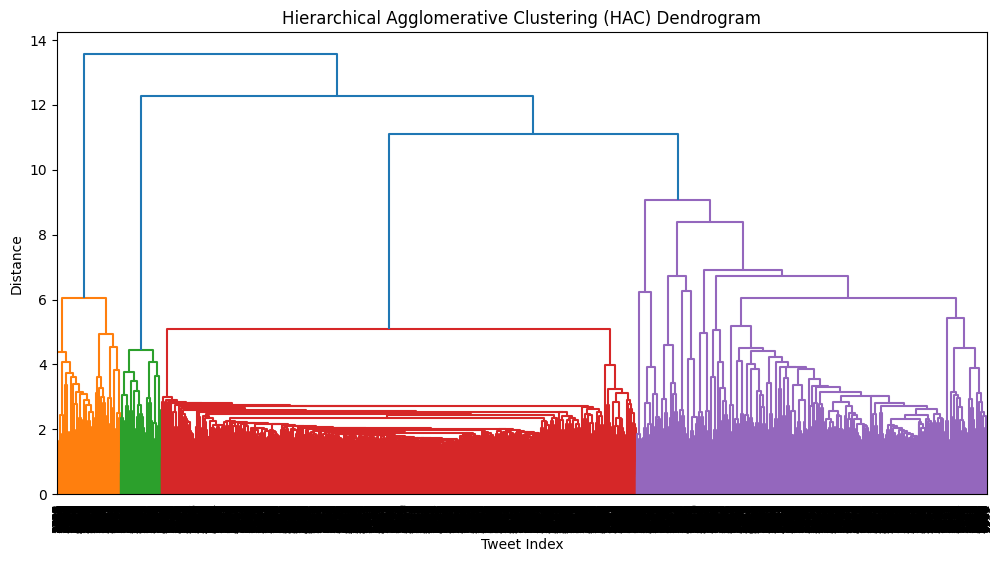

In [9]:
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Agglomerative Clustering (HAC) Dendrogram")
plt.xlabel("Tweet Index")
plt.ylabel("Distance")

dendrogram(Z, leaf_rotation=90., leaf_font_size=8)
plt.show()


In [10]:
clusters = fcluster(Z, 3, criterion='maxclust')
dftrainn["cluster"] = clusters


In [11]:
pd.crosstab(dftrainn["label"], dftrainn["cluster"])


cluster,1,2,3
label,,,
0,4,1,4039
1,318,224,2279
2,242,133,948


In [ ]:
for i in range(1, 4):
    print(f"\nCluster {i} sample tweets:\n")
    print(dftrainn[dftrainn["cluster"] == i]["tweet"].head(3).to_string(index=False))


Cluster 1 sample tweets:

Updated: Multi-vehicle crash in Palm Beach on F...
Updated: Crash in Miami-Dade on Express north b...
Cleared: Crash in Lee on highway south before O...

Cluster 2 sample tweets:

Cleared: Construction on #2Line Both directions...
Incident on #7Line BOTHDIR from 34th Street-Hud...
Updated: Construction on #2Line Both directions...

Cluster 3 sample tweets:

COMPLETE highway MM . EB @ Plsntview/mile Left ...
Motorists traveling north from Coweta and surro...
Who knew making coasters could be so mesmerizin...
